## Superivised Learning algorthim
Support vector machine are computationally efficient and have high accuarcy. SVM are not effected by outlier and classify data effectivly.
SVM are also know margin vector classifier.

In [77]:
### Imported python libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [78]:
##Importing data 
file_pth='./datasets/spam_email_data'
dataset=loadmat(file_pth)
print(dataset.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [79]:
#The data is stored in form of dictionary 
X_trn=dataset['X']
Y_trn=dataset['y']
n=X_trn.shape[1]
m=Y_trn.size
print('Number of feature of the model n=',format(n))
print('Number of training example of the model m=',m)

Number of feature of the model n= 2
Number of training example of the model m= 51


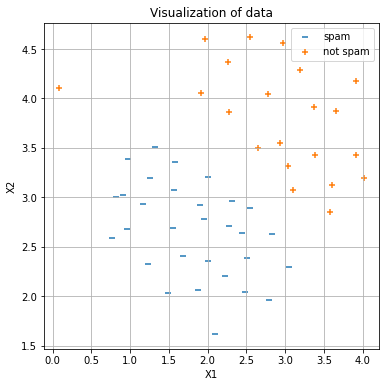

In [80]:
# plotting data for better understanding from visualization 
label0=X_trn[(Y_trn==0).ravel(),:]
label1=X_trn[(Y_trn==1).ravel(),:]
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(label0[:,0],label0[:,1],marker='_',label='spam')
ax.scatter(label1[:,0],label1[:,1],marker='+',label='not spam')
plt.title('Visualization of data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid()

###### From the visualization, we can identify that data requires classification method for predition and decision boundary need to be build
Since the data has outliers in it does Support Vector Machine get affected by it is checked. 


In [81]:
## building SVM algorthim, i would be testing two kernel

def linear_kernel(X,Y):
    return (X.dot(Y))

def gaussian_kernel(X,Y,sigma):
    w=X-Y
    z=w.dot(w)
    K=np.exp(-z/(2*(sigma**2)))
    return K
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
k=gaussian_kernel(x1,x2,2)
print('The value gaussian kernel function for sample data',k)
assert(k==0.32465246735834974)

The value gaussian kernel function for sample data 0.32465246735834974


In [82]:
from sklearn import svm
svm_linear=svm.LinearSVC(C=1)
svm_linear.fit(X_trn,Y_trn.ravel())
print('Accuarcy',svm_linear.score(X_trn,Y_trn.ravel()))
svm_linear.coef_
coef = svm_linear.coef_.ravel()
intercept = svm_linear.intercept_.ravel()

Accuarcy 0.9803921568627451


C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


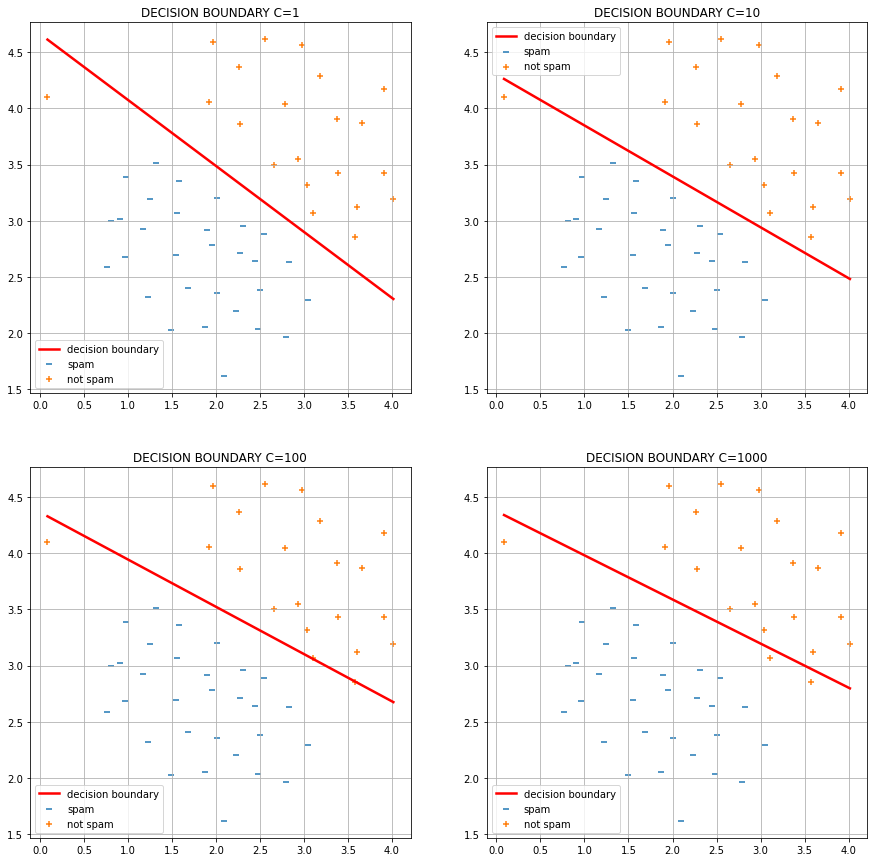

In [83]:
import math as m
C=np.array([1,10,100,1000])
plt.subplots(figsize=(15,15)) 
cols = 2
rows = m.ceil(len(C) / cols)

for index, key in enumerate(C):
    svm_linear=svm.LinearSVC(C=key)
    svm_linear.fit(X_trn,Y_trn.ravel())
    coef = svm_linear.coef_.ravel()
    intercept = svm_linear.intercept_.ravel()
    plt.subplot(rows, cols, index + 1) 
    xp = np.linspace(np.min(X_trn[:, 0]), np.max(X_trn[:, 0]), 100)
    yp = -1.0 * (coef[0] * xp + intercept[0]) / coef[1]
    plt.plot(xp, yp, linestyle='-',label='decision boundary',color='r',linewidth=2.5)
    plt.scatter(label0[:,0],label0[:,1],marker='_',label='spam')
    plt.scatter(label1[:,0],label1[:,1],marker='+',label='not spam')
    plt.title('DECISION BOUNDARY C={}'.format(key))
    plt.legend()
    plt.grid()

### As the value of C increases, the bias decreased but has high variance (Over fitting happens)

In [84]:
##using other kernel funtions
file_pth='./datasets/svm_data2'
dataset=loadmat(file_pth)
print(dataset.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [85]:
#The data is stored in form of dictionary 
X_trn=dataset['X']
Y_trn=dataset['y']
n=X_trn.shape[1]
m=Y_trn.size
print('Number of feature of the model n=',format(n))
print('Number of training example of the model m=',m)

Number of feature of the model n= 2
Number of training example of the model m= 863


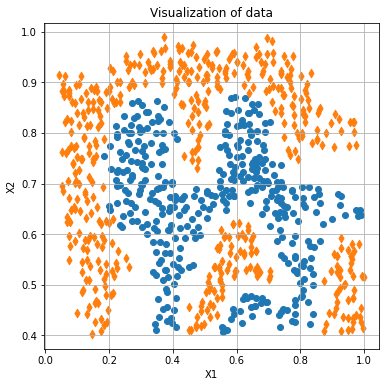

In [86]:
# plotting data for better understanding from visualization 
label0=X_trn[(Y_trn==0).ravel(),:]
label1=X_trn[(Y_trn==1).ravel(),:]
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(label0[:,0],label0[:,1],marker='o')
ax.scatter(label1[:,0],label1[:,1],marker='d')
plt.title('Visualization of data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

### For this kind of data linear kernel cannot be used as they donot yield accurate results, we use gaussian kernel 

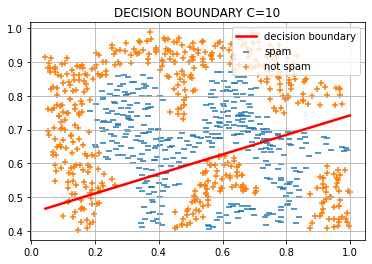

In [87]:
C=10
svm_linear=svm.LinearSVC(C=C)
svm_linear.fit(X_trn,Y_trn.ravel())
coef = svm_linear.coef_.ravel()
intercept = svm_linear.intercept_.ravel()
plt.subplot() 
xp = np.linspace(np.min(X_trn[:, 0]), np.max(X_trn[:, 0]), 100)
yp = -1.0 * (coef[0] * xp + intercept[0]) / coef[1]
plt.plot(xp, yp, linestyle='-',label='decision boundary',color='r',linewidth=2.5)
plt.scatter(label0[:,0],label0[:,1],marker='_',label='spam')
plt.scatter(label1[:,0],label1[:,1],marker='+',label='not spam')
plt.title('DECISION BOUNDARY C={}'.format(C))
plt.legend()
plt.grid()

In [88]:
C=10
gamma=20
svm_gus = svm.SVC(C=C, kernel='rbf', gamma=gamma)
svm_gus.fit(X_trn, Y_trn.ravel())
print ('The accuracy of the model is:', svm_gus.score(X_trn, Y_trn.ravel()))

The accuracy of the model is: 0.9872537659327926


C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.
C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.
C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.
C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.


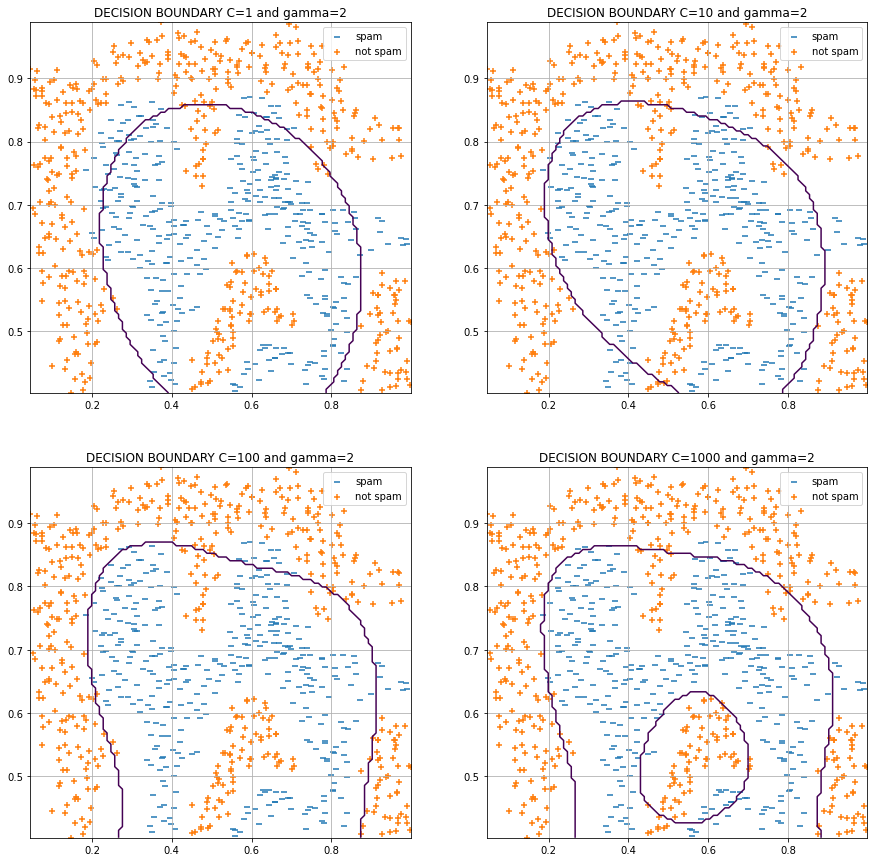

In [89]:
import math as m
C=np.array([1,10,100,1000])
gamma=2
plt.subplots(figsize=(15,15)) 
cols = 2
rows = m.ceil(len(C) / cols)

for index, key1 in enumerate(C):
    svm_gus = svm.SVC(C=key1, kernel='rbf', gamma=gamma)
    svm_gus.fit(X_trn, Y_trn.ravel())
    x1_plot = np.linspace(np.min(X_trn[:, 0]), np.max(X_trn[:, 0]), 100)
    x2_plot = np.linspace(np.min(X_trn[:, 1]), np.max(X_trn[:, 1]), 100)
    X1, X2 = np.meshgrid(x1_plot, x2_plot)
    vals = np.zeros(X1.shape)
    plt.subplot(rows, cols, index + 1) 
    for i in range(X1.shape[1]):
        X_tmp = np.hstack((X1[:, i:i + 1], X2[:, i:i + 1]))
        vals[:, i] = svm_gus.predict(X_tmp)
    plt.scatter(label0[:,0],label0[:,1],marker='_',label='spam')
    plt.scatter(label1[:,0],label1[:,1],marker='+',label='not spam')
    plt.contour(X1, X2, vals, levels=[0])
    plt.title('DECISION BOUNDARY C={} and gamma={}'.format(key1,gamma))
    plt.legend()
    plt.grid()

# SPAM AND NON SPAM EMAIL CLASSIFICATION USING SVM
Implementing a simple email classifier based on the words in the email using SVM

In [90]:
# Buiding a dictionary of all the words
file_pth1='./datasets/vocab.txt'
dictionary=np.genfromtxt(file_pth1,delimiter='\t',dtype='str')

In [91]:
words=dictionary[:,1]
print(words[:10])

['aa' 'ab' 'abil' 'abl' 'about' 'abov' 'absolut' 'abus' 'ac' 'accept']


### pre-processing of email have to be done 
where following are processed 
• Lower-casing
• Stripping HTML
• Normalizing URLs
• Normalizing Numbers
• Normalizing Dollars
• Word Stemming
• Removal of non-words

In [92]:
## standard porterstemmer lib used to find suffix and prefix of words
from nltk import PorterStemmer
import re  # regular expressions operator

def split(delimiters, string, maxsplit=0):
    pattern = '|'.join(map(re.escape, delimiters))
    return re.split(pattern, string, maxsplit)

def email_preprocessing(email,words_list) :
    email_contents = email.lower()
    email_contents = re.sub('<[^<>]+>', ' ', email)
    email_contents = re.sub('[0-9]+', 'number', email)
    email_contents = re.sub('(http|https)://[^\s]*', 'httpaddr', email)
    email_contents = re.sub('[^\s]+@[^\s]+', 'emailaddr', email)
    email_contents = re.sub('[$]+', 'dollar', email)

    words = split(""" @$/#.-:&*+=[]?!(){},'">_<;%\n\r""", email)
    word_indices = []
    stemmer = PorterStemmer()
    for word in words:
        word = re.sub('[^a-zA-Z0-9]', '', word)
        if word == '':
            continue
        word = stemmer.stem(word)
        if word in words_list:
            idx = np.where(words_list==word)
            word_indices.append(idx[0][0])
    return word_indices

In [93]:
with open('./datasets/emailSample1.txt') as f:
    file_contents = f.read().replace('\n', '')
word_indices=email_preprocessing(file_contents,words)
print('The contents of the E-mail :\n',file_contents)
print(word_indices)

The contents of the E-mail :
 > Anyone knows how much it costs to host a web portal ?>Well, it depends on how many visitors you're expecting.This can be anywhere from less than 10 bucks a month to a couple of $100. You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 if youre running something big..To unsubscribe yourself from this mailing list, send an email to:groupname-unsubscribe@egroups.com
[85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1892, 1363, 591, 1675, 237, 161, 88, 687, 944, 1662, 1061, 1698, 374, 1161, 1892, 1509, 797, 1881, 308, 1181, 1236, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 1757, 308]


In [94]:
with open('./datasets/emailSample2.txt') as f:
    file_contents = f.read().replace('\n', '')
word_indices=email_preprocessing(file_contents,words)
print('The contents of the E-mail :\n',file_contents )
print(word_indices)

The contents of the E-mail :
 Folks, my first time posting - have a bit of Unix experience, but am new to Linux. Just got a new PC at home - Dell box with Windows XP. Added a second hard diskfor Linux. Partitioned the disk and have installed Suse 7.2 from CD, which wentfine except it didn't pick up my monitor. I have a Dell branded E151FPp 15" LCD flat panel monitor and a nVidia GeForce4Ti4200 video card, both of which are probably too new to feature in Suse's defaultset. I downloaded a driver from the nVidia website and installed it using RPM.Then I ran Sax2 (as was recommended in some postings I found on the net), butit still doesn't feature my video card in the available list. What next? Another problem. I have a Dell branded keyboard and if I hit Caps-Lock twice,the whole machine crashes (in Linux, not Windows) - even the on/off switch isinactive, leaving me to reach for the power cable instead. If anyone can help me in any way with these probs., I'd be really grateful -I've search

##### To perform classification, we need to create a vector if the word from email is present in our dictionary then x=1 else x=0 irrespective of the times the word was repeated , buildig features

In [95]:
def wordindic(word_ind,word):
    n=word.size
    x=np.zeros((n,1))
    x[word_ind]=1
    return x
features=wordindic(word_indices,words)
index=np.where(features==1)
print('Number of features n:',features.shape[0])
print('Number of word which identified as spam words :',len(index[0]))

Number of features n: 1899
Number of word which identified as spam words : 120


In [96]:
## training svm to classify spam or not
data = loadmat('./datasets/spamTrain.mat')
X_trn = data['X']
Y_trn = data['y'].ravel()

C = 0.1
email_svm = svm.LinearSVC(C=C)
email_svm.fit(X_trn, Y_trn)
p = email_svm.predict(X_trn)
print(' Accuaracy of the model',np.mean(p==Y_trn))

 Accuaracy of the model 0.99975


In [101]:
filename = './datasets/spamSample1.txt'
with open(filename) as f:
    file_contents = f.read().replace('\n', '')

word_ind = email_preprocessing(file_contents,words)
x = wordindic(word_ind,words)
p = email_svm.predict(x.T)
print ('1 indicates spam, 0 indicates not spam')
print(p)
if p==1:
    print('EMAIL IS SPAM')
else:
    print('EMAIL IS NOT A SPAM')

1 indicates spam, 0 indicates not spam
[1]
EMAIL IS SPAM


In [102]:
print(file_contents)

Do You Want To Make $1000 Or More Per Week? If you are a motivated and qualified individual - I will personally demonstrate to you a system that will make you $1,000 per week or more! This is NOT mlm. Call our 24 hour pre-recorded number to get the details.   000-456-789 I need people who want to make serious money.  Make the call and get the facts. Invest 2 minutes in yourself now! 000-456-789 Looking forward to your call and I will introduce you to people like yourself whoare currently making $10,000 plus per week! 000-456-7893484lJGv6-241lEaN9080lRmS6-271WxHo7524qiyT5-438rjUv5615hQcf0-662eiDB9057dMtVl72


In [104]:
filename = './datasets/emailSample1.txt'
with open(filename) as f:
    file_contents = f.read().replace('\n', '')

word_ind = email_preprocessing(file_contents,words)
x = wordindic(word_ind,words)
p = email_svm.predict(x.T)
print ('1 indicates spam, 0 indicates not spam')
print(p)
if p==1:
    print('EMAIL IS SPAM')
else:
    print('EMAIL IS NOT A SPAM')

1 indicates spam, 0 indicates not spam
[0]
EMAIL IS NOT A SPAM


In [105]:
print(file_contents)

> Anyone knows how much it costs to host a web portal ?>Well, it depends on how many visitors you're expecting.This can be anywhere from less than 10 bucks a month to a couple of $100. You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 if youre running something big..To unsubscribe yourself from this mailing list, send an email to:groupname-unsubscribe@egroups.com


In [99]:
filename = './datasets/spamSample2.txt'
with open(filename) as f:
    file_contents = f.read().replace('\n', '')

word_ind = email_preprocessing(file_contents,words)
x = wordindic(word_ind,words)
p = email_svm.predict(x.T)
print ('1 indicates spam, 0 indicates not spam')
print(p)
if p==1:
    print('EMAIL IS SPAM')
else:
    print('EMAIL IS NOT A SPAM')

1 indicates spam, 0 indicates not spam
[1]
EMAIL IS SPAM


In [100]:
filename = './datasets/emailSample2.txt'
with open(filename) as f:
    file_contents = f.read().replace('\n', '')

word_ind = email_preprocessing(file_contents,words)
x = wordindic(word_ind,words)
p = email_svm.predict(x.T)
print ('1 indicates spam, 0 indicates not spam')
print(p)
if p==1:
    print('EMAIL IS SPAM')
else:
    print('EMAIL IS NOT A SPAM')

1 indicates spam, 0 indicates not spam
[0]
EMAIL IS NOT A SPAM
